## Supervised Learning: Regression


Last week Review
1. Numpy
2. Pandas
3. Supervised Learning using Sklearn
4. Case Study with Twitter dataset

This week
1. Supervised learning (Regression)
2. Unsupervised learning using R


<img src="images/week2.png" height="70%" width="70%" align="left">


**Be sure to install R studio**

Recall the difference between Classifaction and Regression


<img src="images/classification_vs_regression.png" height="70%" width="70%" align="left">

Introduction to linear regression

Linear regression tries to model the relationship between two variables: 
    - an dependent variable (y)
    - one or more independent variables (x)
    
 

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_regression(dataset, x_var,y_var):
    data = sns.load_dataset(dataset)
    print(data.head(3))
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[y_var],data[x_var])
    fig = sns.regplot(y=y_var, x =x_var,data=data, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    fig.legend()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3


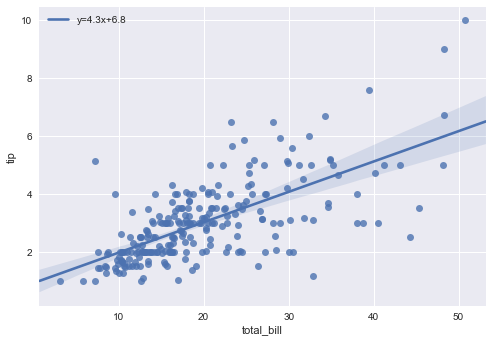

In [2]:
plot_regression("tips","total_bill", "tip")

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31


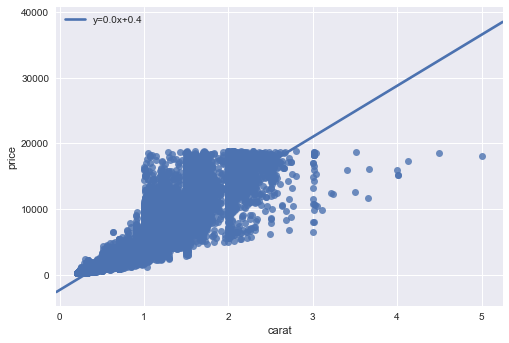

In [3]:
plot_regression("diamonds","carat", "price")

plot_regression("car_crashes","alcohol", "total")

### Evaluation

**Mean Squared Error**

<img src="images/mse.jpg" height="30%" width="30%" align="left">

In [4]:
from sklearn.metrics import mean_squared_error

def mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

mse([1, 2, 3, 4],
    [2, 0, 3, 5])

1.5

In [5]:
mse([3, -0.5, 2, 7],
    [2.5, 0.0, 2, 8])

0.375

**Mean Absolute Error**

<img src="images/mae.png" height="30%" width="30%" align="left">

In [6]:
from sklearn.metrics import mean_absolute_error

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

mae([1, 2, 3, 4],
    [2, 0, 3, 5])

1.0

In [7]:
mae([3, -0.5, 2, 7],
    [2.5, 0.0, 2, 8])

0.5

**R2 score (R2 The coffiecient of determination)**

R2 score is a measure of explained variation to total variation
* An R2 score of 0 means that  Y cannot be predicted from X.
* An R2 score of 1 means Y variable can be predicted without error from X.
* An R2 score between 0 and 1 indicates the extent to which the Y is predictable. An R2 score of 0.10 means that 10 percent of the variance in Y is predictable from X; an R2 of 0.20 means that 20 percent is predictable; and so on.

    - If Coefficient of Determination R2 score is close to 1 then the model fits the data well
    - If Coefficient of Determination R2 score is close to 0 then the model does not fit the data well (obviously)



R2 = { ( 1 / N ) * Σ [ (xi - x) * (yi - y) ] / (σx * σy ) }2



<img src="images/r2.jpg" height="30%" width="30%" align="left">

<img src="images/r2_.png" height="50%" width="50%" align="left">

In [8]:
from sklearn.metrics import r2_score
def r2score(y_true, y_pred):
    return r2_score(y_true, y_pred) 

r2score([0, 1, 2],
        [0, 1, 2])

1.0

In [9]:
r2score([0, 1, 2],
        [0, 3, 2])

-1.0

In [10]:
r2score([0, 1, 2],
        [0.2, 0.8, 2.4])

0.88

### Example

In [11]:


#Importation
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston #import the dataset loader

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


boston = load_boston() #load the dataset

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Prepare the dataset

In [12]:
boston.keys()

dict_keys(['target', 'DESCR', 'data', 'feature_names'])

In [13]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
boston.DESCR.splitlines()

['Boston House Prices dataset',
 '===========================',
 '',
 'Notes',
 '------',
 'Data Set Characteristics:  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive',
 '    ',
 '    :Median Value (attribute 14) is usually the target',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial high

In [15]:
df= pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
df['Home_Value'] = boston.target
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Home_Value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


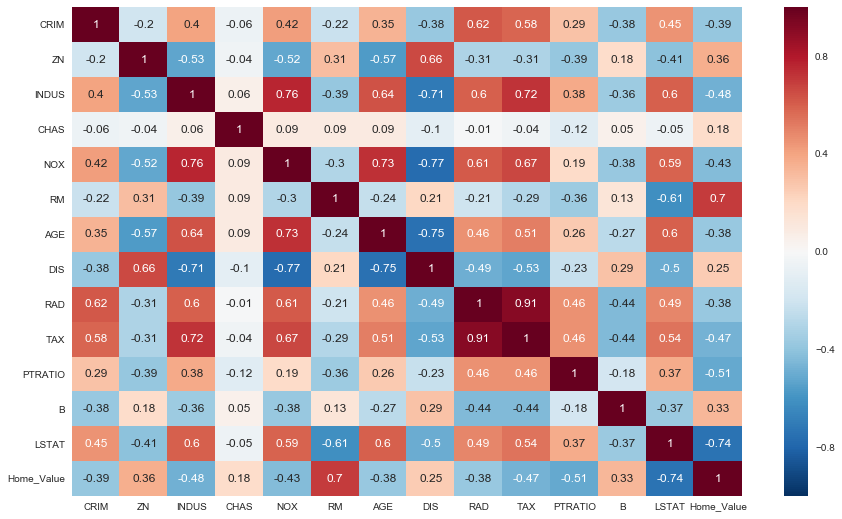

In [17]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(data=correlation_matrix, annot=True)

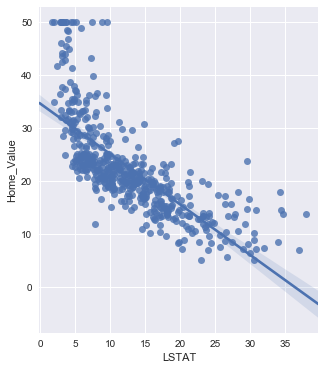

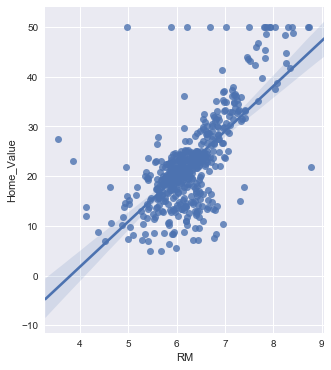

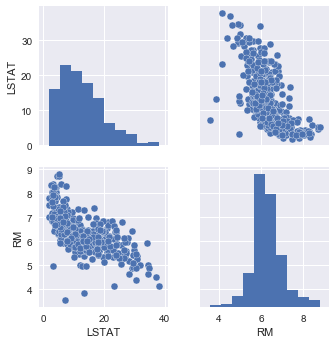

In [18]:

def visualize(selected_features):
        for var in selected_features:
            f, ax = plt.subplots(figsize=(5, 6))
            sns.regplot(x=var, y="Home_Value", data=df, ax=ax);
        sns.pairplot(df, vars=selected_features)
    
visualize(['LSTAT','RM'])

In [19]:
def model(selected_features):
    X = df[selected_features]
    y = pd.DataFrame(data=boston.target)
    clf = linear_model.LinearRegression()
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=7)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rscore = r2_score(y_test, y_pred)
    dictionary = {"y_pred":y_pred,"mae":mae,"mse":mse,"rscore":rscore,"intercept":clf.intercept_,"coef":clf.coef_, "y_test":y_test,}
    return dictionary

In [20]:
model1 = model(['RM'])
model2 = model(['LSTAT','RM'])
model3 = model(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','RAD','DIS','TAX','PTRATIO','B','LSTAT'])

evaluations = pd.DataFrame({'Model_1':  [ model1['mae'],  model1['mse'],model1['rscore'], model1['intercept']],
                        'Model_2': [ model2['mae'],  model2['mse'],model2['rscore'], model2['intercept']],
                        'Model_3': [ model3['mae'],  model3['mse'],model3['rscore'], model3['intercept']],
                       },
                          index = pd.Index(['MAE','MSE',"R-Score","Intercept"]))

print("\n",evaluations.head())

results = pd.DataFrame({'Actual':list(model1['y_test'][0]) , 
                        'Model_1_prediction':  model1['y_pred'].flatten(),
                        'Model_2 _prediction':  model2['y_pred'].flatten(),
                        'Model_3 _prediction':  model3['y_pred'].flatten()
                       })
print("\n",results.head(10))




                         Model_1               Model_2               Model_3
MAE                      4.6318               3.95307               3.30638
MSE                     55.8994               34.8332               25.7479
R-Score                0.242556              0.528006              0.651113
Intercept  [-38.28594231513638]  [-9.339941666773555]  [23.622265313344613]

    Actual  Model_1_prediction  Model_2 _prediction  Model_3 _prediction
0    21.7           23.882084            23.226199            23.108035
1    18.5           19.021409            21.581001            19.041319
2    22.2           20.849023            21.547164            19.903532
3    20.4           19.546362            23.155455            19.139444
4     8.8           19.624133            16.546349             5.773213
5     8.3           13.713553            13.228384            12.406924
6    21.4           22.268340            22.281479            21.562897
7    23.6           24.086232           

//anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
